[View in Colaboratory](https://colab.research.google.com/github/duakaran96/Big-Mart-Sales-Prediction/blob/master/Big_Mart_Analysis.ipynb)

# Big Mart Sales Analysis

*Karan Dua*

*Friday, June 29, 2018*


## Dataset description:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


## Atrribute information:
The dataset has 8524 entries with 13 columns.The description of each columns is given below:
given below:

Variable	Description:

- Item_Identifier :	Unique product ID
- Item_Weight :	Weight of product
- Item_Fat_Content :	Whether the product is low fat or not
- Item_Visibility :	% of total display area in store allocated to this product
- Item_Type :	Category to which product belongs
- Item_MRP :	Maximum Retail Price (list price) of product
- Outlet_Identifier :	Unique store ID
- Outlet_Establishment_Year :	Year in which store was established
- Outlet_Size :	Size of the store
- Outlet_Location_Type :	Type of city in which store is located
- Outlet_Type :	Grocery store or some sort of supermarket
- Item_Outlet_Sales :	Sales of product in particular store. This is the outcome variable to be predicted.

# Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Uploading the dataset in colab directory

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Big_mart.csv to Big_mart.csv
User uploaded file "Big_mart.csv" with length 869537 bytes


# Importing in the dataset

We import the dataset we uploaded in our colab directory into a pandas DataFrame using pandas built-in read_csv() method.

In [0]:
df = pd.read_csv('Big_mart.csv')

Let's have a look at first 5 rows of the dataset using the head() method which returns first 5 rows.

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


The shape of the dataset (rows, columns) :

In [6]:
print(df.shape)

(8523, 12)


Size of the dataset (rows * columns) :

In [7]:
print(df.size)

102276


Here we have a statistical description of all numeric columns of the dataset.


In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The statistical description of the dataset including all columns.

In [9]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


Information about the Dataset including the index dtype and column dtypes, non-null values and memory usage.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


Now we check the count of null values present in each column and we'll try to replace or remove the null values thereafter (if any present).

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

More beautifully we can see the distribution of null values over the dataset with the help of seaborn heatmap.

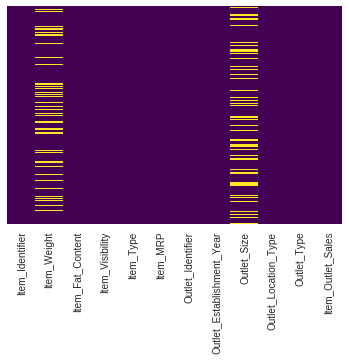

In [12]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Filling in the null values for Item_Weight

We will fill in the null values by taking the Average Weight of that particular item which is also being sold at other stores.

Here we create a dictionary with Item_Identifier as key and Average Weight of that item as value.

In [0]:
avgWeight = {}
for i in set(df['Item_Identifier']):
  avgWeight[i] = (df[df['Item_Identifier'] == i]['Item_Weight'].mean())

Our dictionary is created, but there were some items which were being sold at only one store and also the Item_Weight for them was not available. We will first fill null values for other items and then fill average weight of all items in those particular items.

In [14]:
df[df['Item_Identifier'] == 'FDN52']['Item_Weight']

927   NaN
Name: Item_Weight, dtype: float64

We have defined our function for imputing Item_Weight below:

In [0]:
def imputeItemWeight(cols):
  identifier = cols[0]
  weight = cols[1]
  if pd.isnull(weight):
    return avgWeight[identifier]
  else:
    return weight
  

In [0]:
df['Item_Weight'] = df[['Item_Identifier', 'Item_Weight']].apply(imputeItemWeight, axis=1)

In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Most of the items have  been assigned average weight in place of null values. But 4 items as we discussed above are those which are sold at only one store and weight for them is not available.

Below we have shown those 4 items:

In [18]:
df[df['Item_Weight'].isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [0]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

We imputed the null values with average weight of all the 1559 items availbale to us

In [20]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We have successfully imputed null values for Item_Weight. Now it's turn to impute null values for Outlet_Size column:

In [21]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [22]:
from scipy.stats import mode
outletSizeMode = {}
for i in set(df['Outlet_Type']):
  outletSizeMode[i] = df[df['Outlet_Type'] == i]['Outlet_Size'].mode()[0]

print(outletSizeMode)

{'Supermarket Type1': 'Small', 'Supermarket Type3': 'Medium', 'Supermarket Type2': 'Medium', 'Grocery Store': 'Small'}


It is practical to impute null values for Outlet_Size base upon the Outlet_Type, because Outlet type largely decides the Outlet size. We have taken mode of Outlet_Size for each Outlet_Type and filled in at the place of NaN by defining the below function and applying it on Outlet_Size:

In [0]:
def imputeOutletSize(cols):
  Type = cols[0]
  Size = cols[1]
  
  if pd.isnull(Size):
    return outletSizeMode[Type]
  else:
    return Size

In [0]:
df['Outlet_Size'] = df[['Outlet_Type', 'Outlet_Size']].apply(imputeOutletSize, axis=1)

In [25]:
df['Outlet_Size'].head(20)

0     Medium
1     Medium
2     Medium
3      Small
4       High
5     Medium
6       High
7     Medium
8      Small
9      Small
10    Medium
11     Small
12    Medium
13     Small
14      High
15     Small
16    Medium
17    Medium
18    Medium
19     Small
Name: Outlet_Size, dtype: object

In [26]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Bravo! We've successfully filled in all null values from the dataset.

In [27]:
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [0]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

Some values in Item_Fat_Content were miscode as 'LF' and 'low fat' which meant same as 'Low Fat' , and 'reg' which meant 'Regular'.

So, we have replaced those miscoded values properly.

In [29]:
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [30]:
print(df['Item_Type'].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


# Univariate Analysis

A distribution plot of Item_Weight

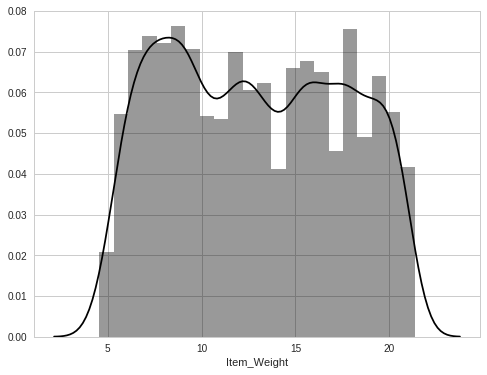

In [32]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(df['Item_Weight'], color='black');
sns.despine;


We can observe three categories of Weight being formed.
- Items falling in lower weight category might be snacks, etc.
- Average weight items might include, soft- drinks or other stuff
- High weight categories might be heavy household items, etc.

Its just a posiible guess being made.

A **countplot** of **Fat Content** of the items is plotted below:

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


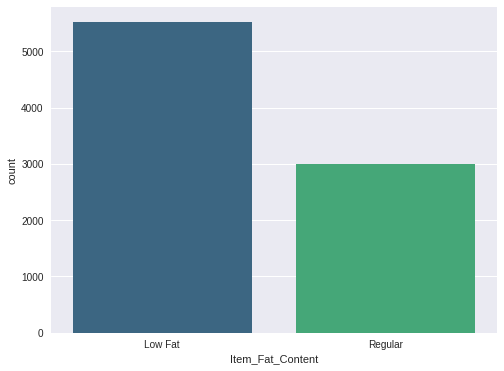

In [33]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x='Item_Fat_Content', data=df, palette="viridis");
sns.despine;

We can infer from the above countplot that most of the items at the Big Mart have Low Fat content in them. Near about 65% of the items have Low Fat and about 35% have Regular Quantity of Fat in them.

A **distribution plot** that combines *histogram* and *kdeplot* is plotted below for the **Item_Visibility** :

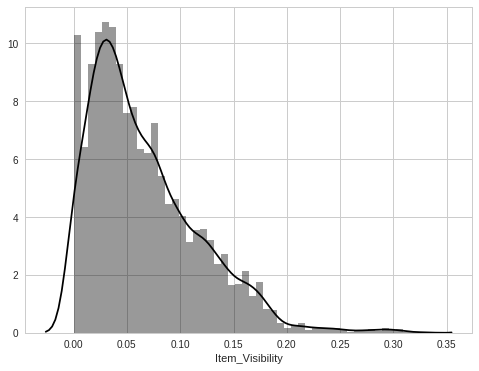

In [34]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(df['Item_Visibility'], color='black');
sns.despine;


We see here Item_Visibility has 0 value too for some items, which sounds impractical. If an item is being sold at the Big Mart then how is is it possible for the visibility of that item to be zero?

In [35]:
print(min(df['Item_Visibility']))

0.0


In [36]:
df['Item_Visibility'].value_counts()[0]

526

There are 526 items in our dataset for which the visibility is given to be zero. We try to replace the '0' with the average visibility of all the items in our dataset.

In [0]:
df['Item_Visibility'] = df['Item_Visibility'].replace({0:df['Item_Visibility'].mean()})

Now we again plot the **Item_Visibility** by using **distplot**

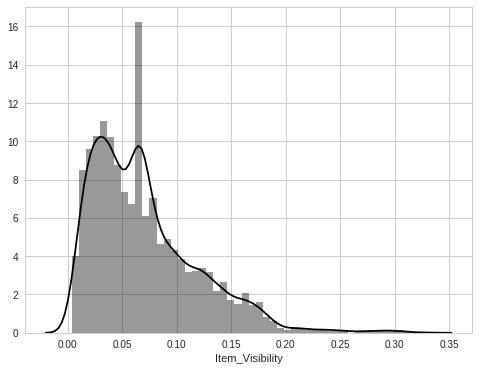

In [38]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(df['Item_Visibility'], color='black');
sns.despine;

- We can clearly infer from the above plot that most of the items have very low visibility. They might be the products which are kept at the back. Might include the products which are not much in demand

- A very few items are kept at the front or near the entrance (having high visibility) where everyone can notice them, maybe the new launched products come under this category.

- A fair number of items have a mediocre amount of visibility. Maybe they are kept in side racks not visible at the very entrance of the Store.

Below is a **distplot** plotted for the MRP (Maximum Retail Price) of the items:

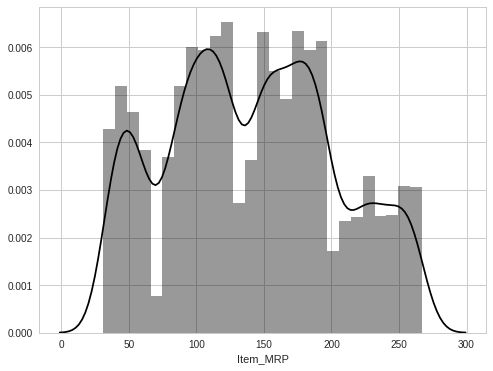

In [39]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(df['Item_MRP'], color='black');
sns.despine;


We can clearly observe that there are 4 different price categories which can serve as a good feature for predictions, if we encode them into categories.

- A fair number of items are found in lower price categories. 

- Most of the items have Price lying in Medium or High category.

-  Small number of items are there which come in Very High Price range.


A **countplot** for checking how the different sized Outlets are distributed is plotted below:

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


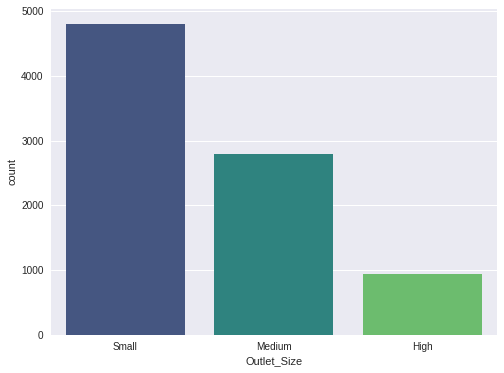

In [40]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x='Outlet_Size', data=df, palette="viridis", order=['Small', 'Medium', 'High']);
sns.despine;

There are different categories for Outlet Size:
- Small
- Medium
- High

*  - Most of the stores are of  Small Size type.
* - A small number of them are Medium Sized.
* - And very less number of stores are Large Sized.

A **countplot** for checking how the different Outlets are distributed  in different city types is plotted below:

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


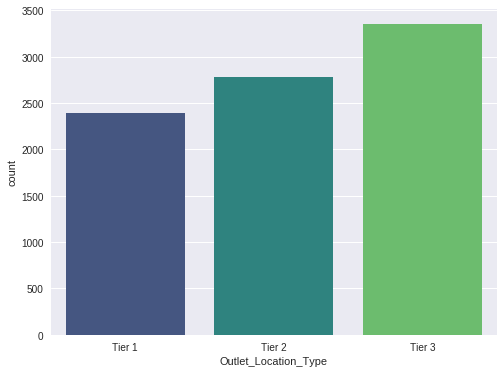

In [41]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.countplot(x='Outlet_Location_Type', data=df, palette="viridis", order=['Tier 1', 'Tier 2', 'Tier 3']);
sns.despine;

- We see the distribution of Outlets in different city types, and found out that there are more number of Outlets in Tier 3 cities, probably because the cost of land, electricity, and setting up Outlet is lower there.

- Then Tier 2 cities have lesser number of Outlets than Tier 3, but more than Tier 1 cities.

- Tier 1 cities have lesser number of Outlets, might be because of the cost factor, or more practically, because of the busy lifestyle of people there, people prefer Online Shopping more.

# Bivariate and Multivariate Analysis

Let's take a look at how various numerical columns are correlated with each other with the help of a seaborn heatmap plotted below:

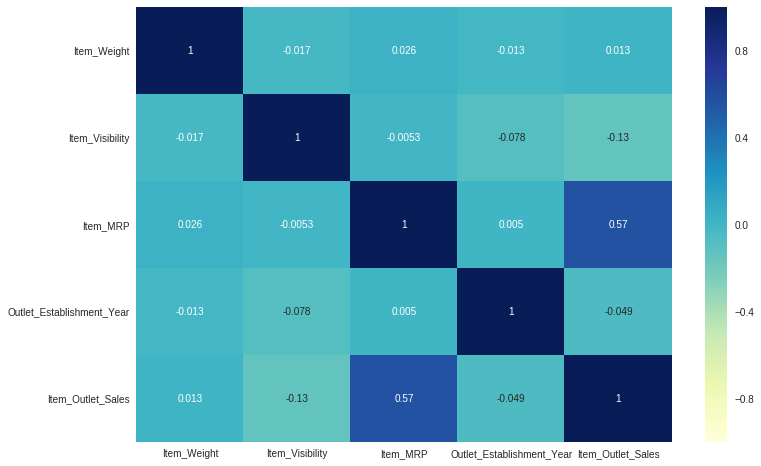

In [42]:
plt.figure(figsize=(12,8));
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True);

A **scatterplot** of Item_Outlet_Sales vs Item_MRP is plotted below:

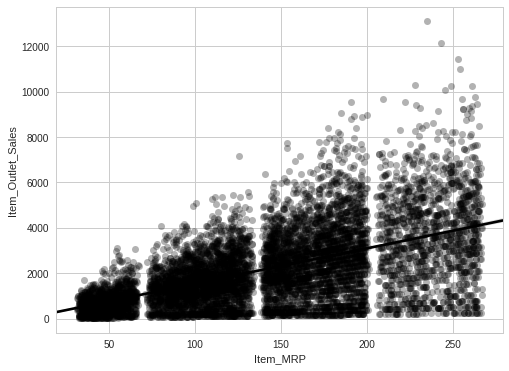

In [43]:
plt.figure(figsize=(8,6));
sns.set_style('whitegrid')
sns.regplot('Item_MRP', 'Item_Outlet_Sales', data=df, x_jitter=0.3, scatter_kws={'alpha':0.3}, color='black');

- Maximum Retail Price and Sales of the Item are strongly and positively correlated with each other having a correlation coefficient of 0.57.

- This sounds practical as the More priced the items are, more they contribute to the Sales.

- Sales are less for the items which are priced lower or mediocre as compared to the items which are highly priced.

A **scatterplot** of Item_Outlet_Sales vs Item_Visibility is plotted below:

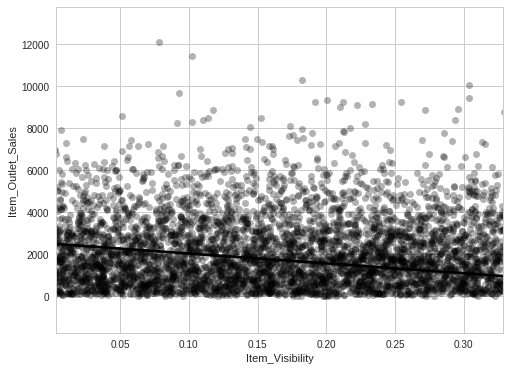

In [44]:
plt.figure(figsize=(8,6));
sns.set_style('whitegrid')
sns.regplot('Item_Visibility', 'Item_Outlet_Sales', data=df, x_jitter=0.3, scatter_kws={'alpha':0.3}, color='black');
plt.xlim(df['Item_Visibility'].min(), df['Item_Visibility'].max());

We see a decreasing trend of Sales vs Item_Visibility.

Item_Visibility and Item_Outlet_Sales are negatively correlated with a coefficient of -0.13

Density of Item_Outlet_Sales is given as a **kdeplot** below. Item_Outlet_Sales are plotted grouped on the basis of Outlet_Size:

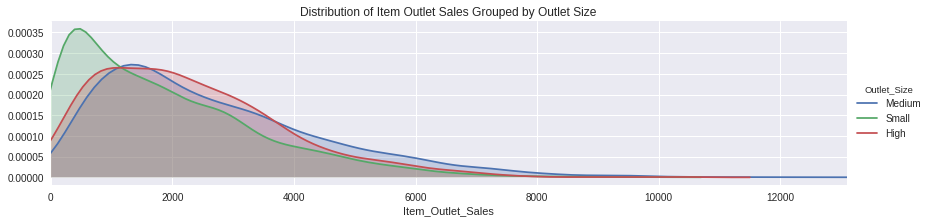

In [45]:
sns.set_style('darkgrid')
fig = sns.FacetGrid(df, hue='Outlet_Size', aspect=4);
fig.map(sns.kdeplot, 'Item_Outlet_Sales', shade=True);
oldest = df['Item_Outlet_Sales'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Item Outlet Sales Grouped by Outlet Size');
fig.add_legend();

A more clear picture can be drwan from the **boxplot** of Item_Outlet_Sales vs Outlet_Size plotted below:

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


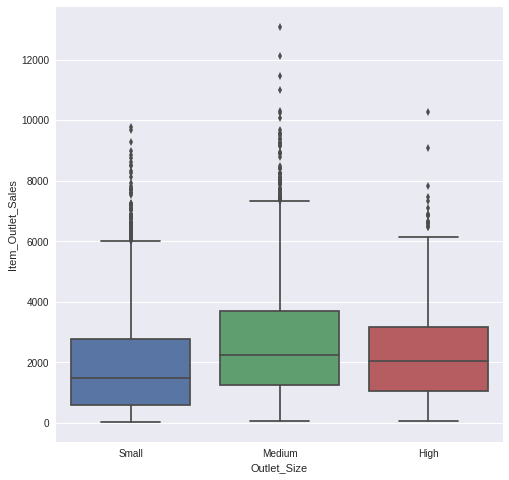

In [46]:
plt.figure(figsize=(8,8))
sns.boxplot('Outlet_Size', 'Item_Outlet_Sales', data=df, order=['Small', 'Medium', 'High']);

Much distinction cannot be inferred in Item Sales for different Outlet Sizes.

However, we can say that Medim - sized outlets have somewhat higher sales than other two types.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


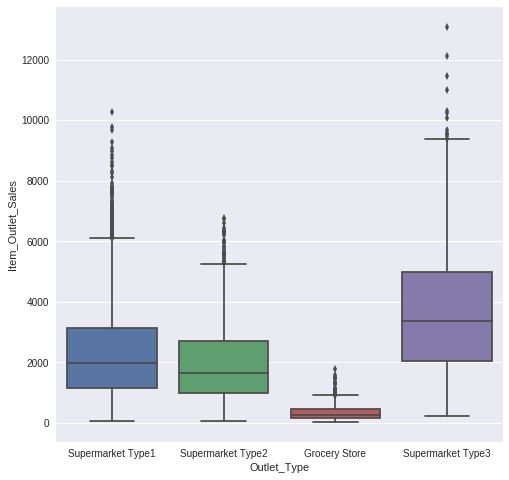

In [47]:
plt.figure(figsize=(8,8))
sns.boxplot('Outlet_Type', 'Item_Outlet_Sales', data=df);

We see that there is a clear distinction in sales figures between grocery stores and supermarkets. 

This is confirmed if we look at the following **Multivariate plot** plotted for sales figures across various item categories: 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


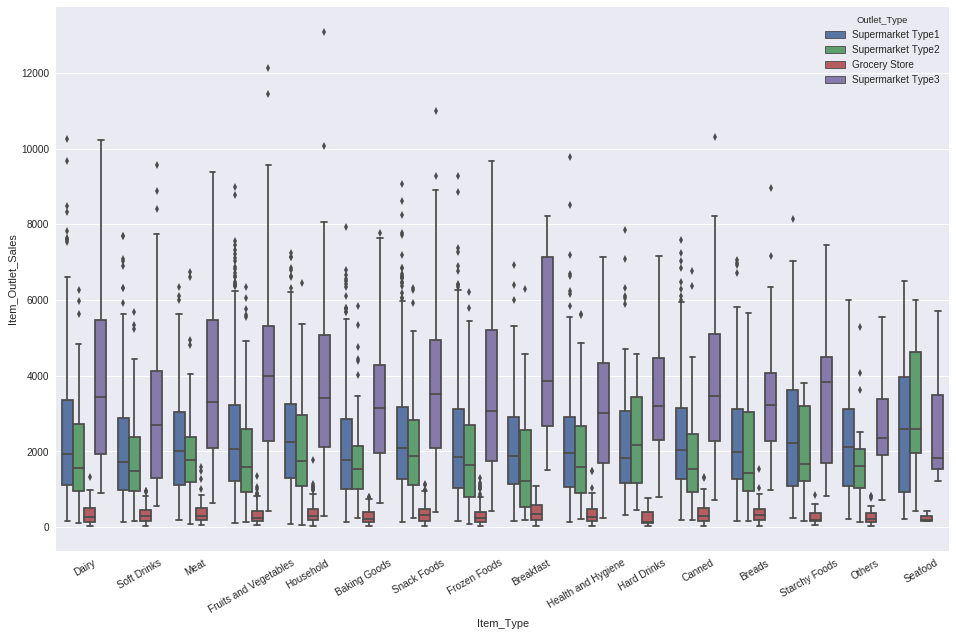

In [48]:
plt.figure(figsize=(16,10))
ax = sns.boxplot('Item_Type', 'Item_Outlet_Sales', data=df, hue='Outlet_Type');
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

In an overall analysis of Outlet_Type:
- Grocery stores have much lesser sales than Supermarkets, which is confirmed from above two plots.
- On whole, if we look at distinction between Supermarket types, Supermarket type 3 has higher sales than other two.
- Supermarket type 1 and type 2, however, cannot be differentiated much.

# Feature Engineering

We create a deep copy of the original cleaned dataframe that we have analysed in above sections.

Then we will proceed doing feature engineering on the copy created.

Here are the first five rows of dataframe displayed.

In [49]:
data = df.copy()
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
print(data['Item_Type'].nunique())
print(data['Item_Type'].unique())

16
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


The Item_Type variable has 16 unique categories for items. It might be a good idea to combine them to get better results. We can manually assign each of them into new categories.

Or if we look at Item_Identifier we see first two characters denote 'FD', 'DR' and 'NC' which mean 'Food', 'Drink' and 'Non - Consumable' respectively.

We can use it to assign categories.

In [51]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x : x[0:2])
data['Item_Type_Combined'].head()

0    FD
1    DR
2    FD
3    FD
4    NC
Name: Item_Type_Combined, dtype: object

Now it's turn to map 'FD', 'DR', and 'NC' with 'Food', 'Drinks', and 'Non - Consumable' respectively.

In [52]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food', 'DR':'Drinks', 'NC':'Non-Consumable'})
data['Item_Type_Combined'].value_counts()


Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

The sales data was collected in 2013.

The stores which are opened from a longer period of time might have higher sales as it sounds practical to relate them, because a store which is in operation for longer time might have many customers associated with them for a long time, who would prefer to buy more items from the store.

So, having the Operation Years for each store can be a good predictor.

In [53]:
data['Outlet_Operation_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Operation_Years'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Operation_Years, dtype: int64

It is non-sensical to label Fat Content on items which are Non - Consumable, So for the items which are of Non - Consumable Type, we label Fat Content column as 'Non - Edible'.

In [54]:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [55]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Operation_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


We have our dataset in the above Feature Engineered form. Now we'll do numerical encoding of the categorical columns which are of string type.

In the cell below we have imported LabelEncoder method from sklearn.preprocessing to encode categorical columns into numericals.

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
categorical_cols = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet_Identifier']
encode = LabelEncoder()

for item in categorical_cols:
  data[item] = encode.fit_transform(data[item])

LabelEncoder encodes categories into numbers as 0, 1, 2, and so on..

So our model might get confuse and give more weightage to category with higher number which is not the case.

Hence, we have to create dummies in order to give equal importance to each category present.

In the cell below we create dummy variables for the categorical columns.

In [0]:
data = pd.get_dummies(data, columns=categorical_cols)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 34 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Item_Outlet_Sales            8523 non-null float64
Outlet_Operation_Years       8523 non-null int64
Item_Fat_Content_0           8523 non-null uint8
Item_Fat_Content_1           8523 non-null uint8
Item_Fat_Content_2           8523 non-null uint8
Outlet_Location_Type_0       8523 non-null uint8
Outlet_Location_Type_1       8523 non-null uint8
Outlet_Location_Type_2       8523 non-null uint8
Outlet_Size_0                8523 non-null uint8
Outlet_Size_1                8523 non-null uint8
Outlet_Size_2                8523 non-null uint8
Item_Type_Combined_0         8523 non-null uint8
I

We can see in the above info of our dataset, the dummy columns created in place of original categorical columns.

Now we store all the features into X , by dropping the columns for which we have already created other engineered columns or the columns which we don't require as feature.

Item_Identifier does not seem to be a good feature for prediction, so we drop it.

In [0]:
X = data.drop(['Item_Identifier', 'Item_Type', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']

In [92]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Operation_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,9.30,0.016047,249.8092,14,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,4,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,14,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.066132,182.0950,15,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.066132,53.8614,26,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [93]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

# Building and Training Linear Regression Model

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression(normalize=True)

In [65]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

## Predictions and Evaluation

In [0]:
predict = lm.predict(X_test)

In [94]:
print('Score: ')
lm.score(X_test, y_test)

Score: 


0.5686493361194513

In [95]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 809.1834794869958
MSE: 1158872.6505588947
RMSE: 1076.5094753688397


# Trying ensemble methods

## GradientBoosting Regressor

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

We try to fine-tune parameters for our GradientBoosting Regressor by using **GridSearch**

In [0]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {'n_estimators':[10, 50, 100, 150, 500, 1000]}
grid = GridSearchCV(GradientBoostingRegressor(), param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'n_estimators': 50}


By using GridSearch we came to know that for best resuts, value for n_estimators should be kept 50

## Building and Training the model

In [0]:
gbr = GradientBoostingRegressor(n_estimators=50)

In [90]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

## Predictions and Evaluation

In [0]:
gbrpredict = gbr.predict(X_test)

In [99]:
print('Score: ')
gbr.score(X_test, y_test)

Score: 


0.6139938994800684

In [97]:
print('MAE:', metrics.mean_absolute_error(y_test, gbrpredict))
print('MSE:', metrics.mean_squared_error(y_test, gbrpredict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbrpredict)))

MAE: 724.2069730608146
MSE: 1037049.3204232393
RMSE: 1018.3561854396718


## RandomForest Regressor

## Building and Training the model

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf = RandomForestRegressor()

In [76]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Predictions and Evaluation

In [0]:
rfpredict = rf.predict(X_test)

In [100]:
print('Score: ')
rf.score(X_test, y_test)

Score: 


0.5273524718743898

In [101]:
print('MAE:', metrics.mean_absolute_error(y_test, rfpredict))
print('MSE:', metrics.mean_squared_error(y_test, rfpredict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfpredict)))

MAE: 798.2438939538521
MSE: 1269821.3763517411
RMSE: 1126.86351274311


We did not get results that we desired . 

So we will fine-tune 'max_depth' and 'n_estimators' parameters for our RandomForest Regressor by using **GridSearch**.

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = {'max_depth':[2,3,4,5,6], 'n_estimators':[10, 50, 100, 150, 500, 1000]}

In [0]:
grid = GridSearchCV(RandomForestRegressor(), param_grid)

In [81]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6], 'n_estimators': [10, 50, 100, 150, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

By performing GridSearch we get our best parameters as below for our RandomForest Regressor

In [82]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 50}

## Training with tuned - parameters

In [0]:
Rf = RandomForestRegressor(max_depth=5, n_estimators=50)

In [87]:
Rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Predictions and Evaluation


In [0]:
Rfpredict = Rf.predict(X_test)

Score:

In [88]:
Rf.score(X_test, y_test)

0.6097732935695706

In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, Rfpredict))
print('MSE:', metrics.mean_squared_error(y_test, Rfpredict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Rfpredict)))

MAE: 723.5123323379154
MSE: 1048388.4585491928
RMSE: 1023.9084229310708


# Summarization

We performed Exploratory Data Analysis of the dataset of Big Mart Sales by looking at some amaing visualizations, we decided which variables can be good predictors and which variables on some modification can perform the task of a good predictor for the Sales.

Then we performed feature engineering on our dataset as required. We modified some columns for the convenience of prediction. Label encoded the columns, and created dummy variables.

In order to find a decent model to predict sales an extensive search of various machine learning models available in Python was performed. 


# CONCLUSION

After an extensive search for models available under *scikit-learn* , the **Python** Machine Learning library, we decided to take one basic **Linear Regression** model, and two ensemble learners **GradientBoosting Regressor** and **RandomForest Regressor**.

Results did not came as expected in case of Linear Regression as we got an accuracy score of 0.568.

But the ensemble learners after tuning them for best parameters using GridSearch performed somewhat well.

RandomForest Regressor gave an accuracy score of 0.609 with following Error values:
- MAE: 723.5123323379154
- MSE: 1048388.4585491928
- RMSE: 1023.9084229310708

GradientBoosting Regressor gave an accuracy score 0f 0.61 with following Error values:
- MAE: 724.2069730608146
- MSE: 1037049.3204232393
- RMSE: 1018.3561854396718